# PROJECT -  MYOCARDIAL INFARCTION PREDICTION IN YOUTH

# 1. Data Preprocessing

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset

df = pd.read_excel("C:\\Users\\farru\\Downloads\\Youth data.xlsx")

In [3]:
# Displaying first 10 rows of the dataset

df.head(10)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1,1,COUGH.BLEEDING,1,0,5
2,25,21-30,Male,URBAN,MARRIED,NO,YES,FREE,YES,YES,...,0.0,1,0,7,1,1,SKIN.BLEEDING,1,0,36
3,35,31-40,Male,URBAN,MARRIED,YES,NO,FREE,YES,YES,...,3.8,2,0,7,4,1,LUNGS,1,0,32
4,38,31-40,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.2,2,0,7,3,1,SKIN.BLEEDING,1,1,15
5,40,31-40,Male,URBAN,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,0,7,3,1,COUGH.BLEEDING,1,1,29
6,40,31-40,Male,URBAN,MARRIED,NO,NO,PAID,YES,YES,...,0.0,1,0,7,1,1,COUGH.BLEEDING,1,0,36
7,44,41-50,Male,URBAN,MARRIED,NO,YES,FREE,YES,YES,...,0.0,1,0,7,1,1,COUGH.BLEEDING,1,1,15
8,45,41-50,Male,URBAN,MARRIED,YES,NO,FREE,YES,YES,...,1.8,2,0,6,2,1,COUGH.BLEEDING,1,1,7
9,45,41-50,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.5,2,0,7,3,1,SKIN.BLEEDING,1,0,32


In [4]:
# Getting information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       92 non-null     int64  
 1   Age.Group                                                                                 92 non-null     object 
 2   Gender                                                                                    92 non-null     object 
 3   Locality                                                                                  92 non-null     object 
 4   Marital status                                                                            92 non-null     object 
 5   Life.Style                                                 

In [5]:
# Getting information about the datatype of columns of the dataset

df.dtypes

Age                                                                                           int64
Age.Group                                                                                    object
Gender                                                                                       object
Locality                                                                                     object
Marital status                                                                               object
Life.Style                                                                                   object
Sleep                                                                                        object
Category                                                                                     object
Depression                                                                                   object
Hyperlipi                                                                                    object


In [6]:
# Getting descriptive statistics of data

df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,92.000000,92.000000,92.000000,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.000000,92.000000,92.000000
mean,43.086957,0.271739,0.369565,120.699348,0.0,247.369565,49.154348,1.892826,137.489130,4.192391,...,0.565217,1.238043,1.782609,0.304348,6.282609,1.880435,1.0,0.858696,0.478261,25.652174
std,8.260394,0.447294,0.485332,26.779602,0.0,136.034717,74.704868,4.504933,3.003641,0.288320,...,0.498445,1.231174,0.530935,0.737372,1.432174,0.992747,0.0,0.350244,0.502264,15.939056
min,24.000000,0.000000,0.000000,80.500000,0.0,60.000000,2.300000,0.800000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.0,0.000000,0.000000,1.000000
25%,40.000000,0.000000,0.000000,100.600000,0.0,137.000000,28.000000,0.900000,135.750000,4.000000,...,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,1.0,1.000000,0.000000,15.000000
50%,45.000000,0.000000,0.000000,120.800000,0.0,213.000000,33.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,0.000000,7.000000,1.500000,1.0,1.000000,0.000000,29.000000
75%,50.000000,1.000000,1.000000,130.800000,0.0,327.000000,40.000000,1.000000,139.000000,4.400000,...,1.000000,2.000000,2.000000,0.000000,7.000000,3.000000,1.0,1.000000,1.000000,36.000000
max,50.000000,1.000000,1.000000,190.110000,0.0,563.000000,394.000000,22.900000,143.000000,4.800000,...,1.000000,3.800000,3.000000,3.000000,7.000000,4.000000,1.0,1.000000,1.000000,60.000000


In [7]:
# Getting shape of the dataset

df.shape

(92, 60)

In [8]:
# Checking for the null values

df.isnull().sum()

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

In [9]:
# Checking duplicate data

df.duplicated().sum()

58

In [10]:
# Converting categorical data to numeric data

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
object_list = df.select_dtypes(include = "object").columns

for obj in object_list:
    df[obj] = label.fit_transform(df[obj].astype(str))

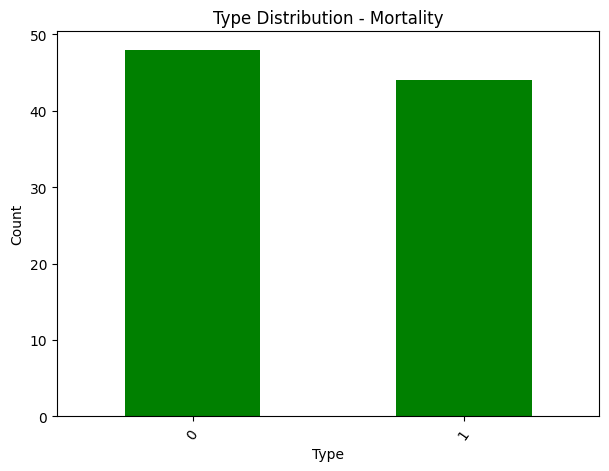

In [11]:
# Visualizing Mortality rate

type_counts = df['Mortality'].value_counts()

plt.figure(figsize = (7,5))
type_counts.plot(kind = 'bar', color = 'green')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type Distribution - Mortality')
plt.xticks(rotation = 55)
plt.show()

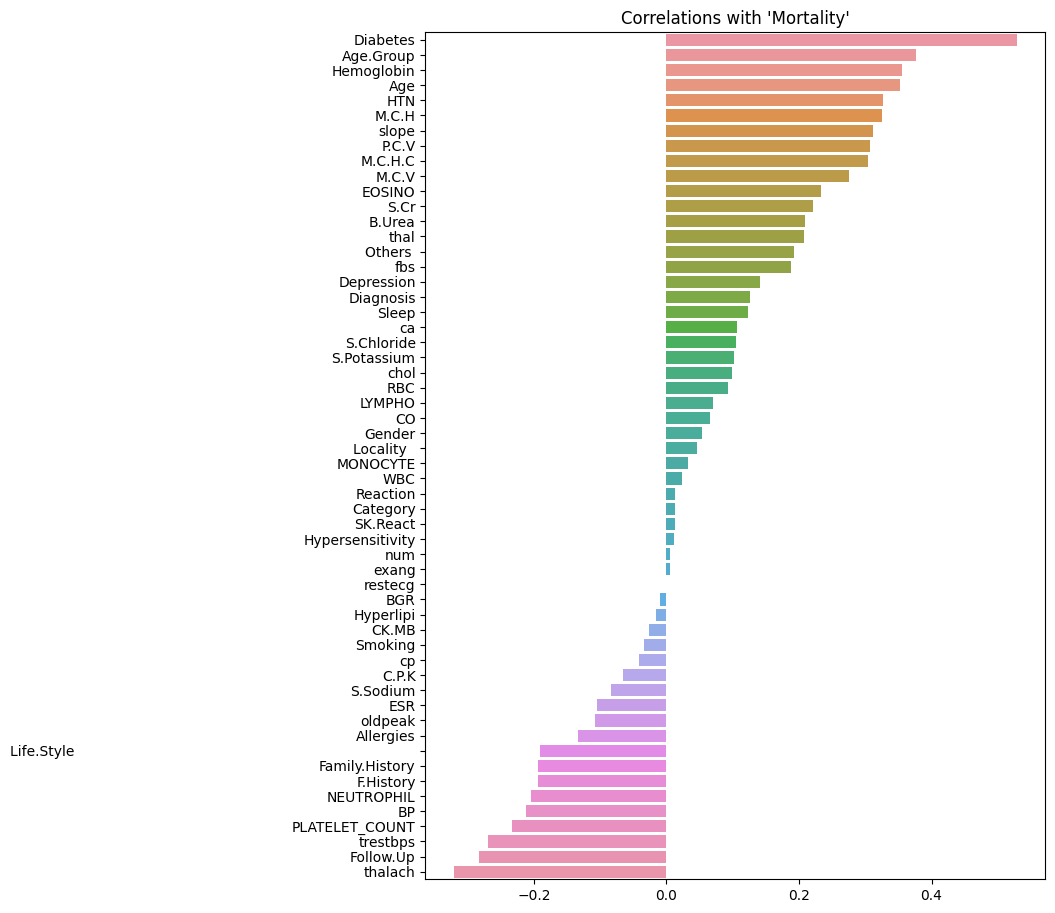

In [12]:
# Correlations

import seaborn as sns
limit = -1.0

data = df.corr()['Mortality'].sort_values(ascending = False)
indices = data.index
labels = []
corr = []

for i in range(1, len(indices)):
    if data[indices[i]] > limit:
        labels.append(indices[i])
        corr.append(data[i])
        
fig, ax = plt.subplots(figsize=(8,11))
sns.barplot(x = corr, y = labels, ax = ax)
plt.title("Correlations with 'Mortality'")
plt.show()

# 2. Machine Learning

In [15]:
# Importing StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Splitting Independent and Dependent variables
x = df.drop(columns = "Mortality")
y = df["Mortality"]

scaled_data = scaler.fit_transform(x)

# Splitting data intro Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.20, random_state = 123)

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


x_train:  (73, 59)
x_test:  (19, 59)
y_train:  (73,)
y_test:  (19,)


In [20]:
from IPython.display import clear_output

In [21]:
# LazyClassifier 

import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, 
                    ignore_warnings = True,
                    custom_metric = None,
                    predictions = False,
                    random_state = 123,
                    classifiers = 'all')
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
clear_output()

In [22]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
AdaBoostClassifier                 0.89               0.91     0.91      0.90  \
BaggingClassifier                  0.89               0.91     0.91      0.90   
XGBClassifier                      0.89               0.91     0.91      0.90   
SGDClassifier                      0.89               0.91     0.91      0.90   
RidgeClassifierCV                  0.89               0.91     0.91      0.90   
RidgeClassifier                    0.89               0.91     0.91      0.90   
RandomForestClassifier             0.89               0.91     0.91      0.90   
QuadraticDiscriminantAnalysis      0.89               0.91     0.91      0.90   
Perceptron                         0.89               0.91     0.91      0.90   
PassiveAggressiveClassifier        0.89               0.91     0.91      0.90   
LogisticRegression          

# 3. Plotting visualization for model selection

In [26]:
# Importing necessary libraries

import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from yellowbrick.classifier import ROCAUC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

In [28]:
# Visualization for Accuracy VS Model

line = px.line(data_frame = models, y = ["Accuracy"], markers = True)
line.update_xaxes(title = "Model",
                 rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color = "blue")
line.update_layout(showlegend = True,
                  title = {
                      'text' : 'Accuracy VS Model',
                      'y' : 0.94,
                      'x' : 0.5,
                      'xanchor' : 'center',
                      'yanchor' : 'top'})
line.show()

In [30]:
# Visualization for Time Taken VS Model

line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Time(s)")
line.update_traces(line_color="black")
line.update_layout(showlegend = True,
    title = {
        'text': 'Time Taken vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

# 4. Model Selection

In [37]:
# AdaBoostClassifier - Grid Search

from sklearn.ensemble import AdaBoostClassifier


param_grid = {
    'n_estimators': [1, 50, 100],
    'random_state': [1, 42, 123]}

ada = AdaBoostClassifier()

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
grid_search = GridSearchCV(ada, cv=stratified_kfold, param_grid = param_grid, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy  :", test_accuracy)

Best Parameters: {'n_estimators': 50, 'random_state': 1}
Test Accuracy  : 0.8947368421052632


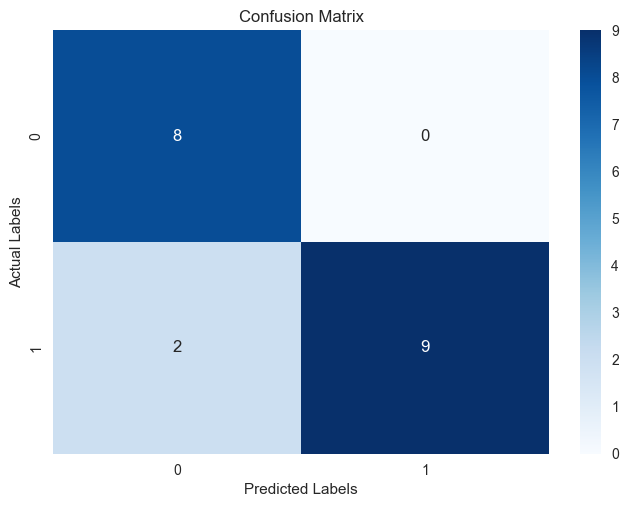

In [38]:
# Create a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [39]:
# Generate classification report

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.82      0.90        11

    accuracy                           0.89        19
   macro avg       0.90      0.91      0.89        19
weighted avg       0.92      0.89      0.90        19



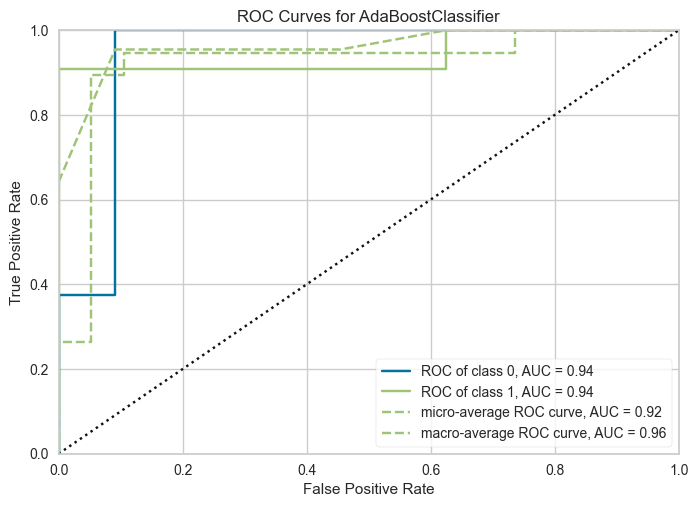

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
# Generating ROC curve

ROC = ROCAUC(ada)
ROC.fit(x_train, y_train)
ROC.score(x_test, y_test)
ROC.poof()